<a href="https://colab.research.google.com/github/marcelolandivar/Python_Projects/blob/master/RealTime_Scrapping%26Visualization-Football-articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**WEB SCRAPPING & VISUALIZATION** 
**Football news Scrapping and Visualization of news relationship** \
###By: Marcelo Landivar
---

>**Email:** <MarceloLandivar24@gmail.com>\
> **RESOURCES:** BeautifulSoup and NetworkX


Open this notebook in Google Colaboratory:  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1eaMPYQHg5c49yv2iEGt3idvhhizrJViV/view?usp=sharing)

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time

def getWords(text,words):
    counter = 0
    for word in words:
        counter += text.count(word)
    return counter

def getText(soup):
  try:
    text = soup.find('div', class_='articulo').text
  except AttributeError:
    text = soup.find('div').text
  
  return text

def getLinks(soup):
  listoflinks = set()
  try:
    for link in soup.find('div', class_='content').find_all('a', href=True):
      b= "football"
      if link['href'].startswith('https://en.as.com/en/') and b in link['href'] :
        listoflinks.add((link["href"]))
  except AttributeError:
      for link in soup.find('div').find_all('a', href=True):
        b= "football"
        if link['href'].startswith('https://en.as.com/en/') and b in link['href'] :
          listoflinks.add((link["href"]))

  return listoflinks

def writeHTML():
    f = open('myplot.html','w')

    message = """<html>
    <meta http-equiv="refresh" content="2">
    <head></head>
    <body><img src='network.png'></body>
    </html>"""

    f.write(message)
    f.close()


listofwords =  ['Real Madrid', 'La liga', 'Santiago Bernabeu', 'Barcelona']

df = pd.DataFrame(columns = ["from","to","size"])

linksexplored = set() #avoid the addition of clauses to verify if the link is printed again
linkstoexplore = ["https://en.as.com/en/2020/08/26/football/1598457340_702072.html"]

https://en.as.com/en/2020/08/26/football/1598457340_702072.html
https://en.as.com/en/2020/08/25/football/1598384870_092263.html
https://en.as.com/en/2020/08/25/football/1598378880_504946.html
https://en.as.com/en/2020/08/27/football/1598481870_036358.html?omnil=resrelrecom


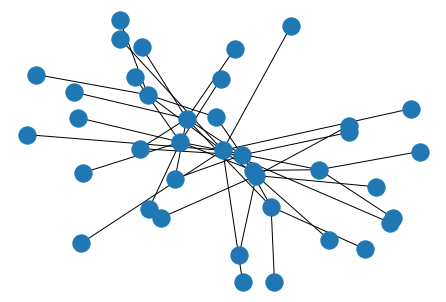

In [10]:
timeout = time.time() + 60*1   # 5 minutes from now
while True:

  if time.time() > timeout:
        break
  link = linkstoexplore.pop()
  print(link)
    
  linksexplored.add(link)

  page = requests.get(link)
  soup = BeautifulSoup(page.content, 'html.parser')
    
  text = getText(soup)


  count = getWords(text,listofwords)

  links = getLinks(soup)
  links = [ l for l in links if l not in linksexplored ]

  for l in links:
    df = df.append({"from": link, "to":l, "size": count },ignore_index=True)
    linkstoexplore.append(l)
    
  G=nx.from_pandas_edgelist(df,"from","to")
    
  nx.draw(G)
    
  plt.savefig('network.png')
    
  writeHTML()
  time.sleep(15)
#  while (len(linkstoexplore) !=0):

  
    

In [ ]:
print(df)